In [2]:
pip install nltk

     |████████████████████████████████| 1.5 MB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 285 kB 34.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import seaborn as sn
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
reddit_comments = pd.read_csv("updated_total_reddit_comments_NB.csv")
reddit_comments

,score,body
0,Neutral,When are the deposits suppose to hit? Do you h...
1,Positive,Wow 😂😂
2,Neutral,Everyone from fomo Tuesday last week will star...
3,Neutral,Use Uphold app to purchase more doge !
4,Positive,200k @ 0.007 been holding strong!
...,...,...
521847,Neutral,Give Eth a glass of milk
521848,Neutral,"we have each other, right?"
521849,Positive,It seems like a lot of people are thinking we’...
521850,Negative,Last night watching ADA rise I was stressing o...


In [3]:
features = reddit_comments['body']
labels = reddit_comments['score']

In [4]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [5]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [7]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=10, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [8]:
predictions = text_classifier.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
array = (confusion_matrix(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[11742  2891  4129]
 [  730 42860  1272]
 [ 2488  3261 34998]]
              precision    recall  f1-score   support

    Negative       0.78      0.63      0.70     18762
     Neutral       0.87      0.96      0.91     44862
    Positive       0.87      0.86      0.86     40747

    accuracy                           0.86    104371
   macro avg       0.84      0.81      0.82    104371
weighted avg       0.86      0.86      0.85    104371

0.8584760134520125


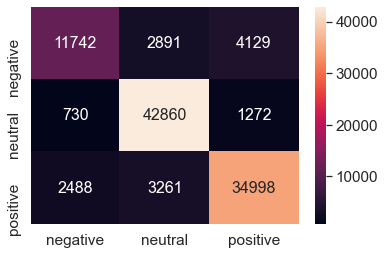

In [23]:
df_cm = pd.DataFrame(array, range(3), range(3))
# plt.figure(figsize=(10,7))
x_axis = ['negative', 'neutral', 'positive']
y_axis = ['negative', 'neutral', 'positive']
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g',xticklabels=x_axis, yticklabels=y_axis) # font size
plt.show()

In [18]:
plot_confusion_matrix(cm           = np.array([[11742,  2891,  4129],
                                             [  730, 42860,  1272],
                                             [ 2488,  3261, 34998]]), 
                      normalize    = False,
                      target_names = labels,#['negative', 'neutral', 'positive'],
                      title        = "Confusion Matrix")

TypeError: plot_confusion_matrix() got an unexpected keyword argument 'cm'

In [ ]:
plot_confusion_matrix(cm           = array 
                      normalize    = True,
                      target_names = ['negative', 'neutral', 'positive'],
                      title        = "Confusion Matrix")